# Linear regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)


In [ ]:
df = pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv')
df.hist();

In [ ]:
df.info();

In [ ]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['charges'])
y = df['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2)
print('Train:',X_train.shape)
print('Test:',X_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_lr =  LinearRegression()
model_rfg = RandomForestRegressor(n_estimators=500 , max_depth=3)

model_rfg.fit(X_train , y_train)
model_lr.fit(X_train , y_train)

print('Model Randomforest: ', model_rfg.score(X_train , y_train))
print('Model Linear Regresion' , model_lr.score(X_train , y_train))


In [ ]:
from sklearn.metrics import mean_absolute_error , root_mean_squared_error , r2_score

In [ ]:
y_pred_test = model_rfg.predict(X_test)
y_pred_train = model_rfg.predict(X_train)

print(mean_absolute_error(y_train , y_pred_train) )
print(mean_absolute_error(y_test , y_pred_test))

In [ ]:
compare = pd.DataFrame({'Y_true': y_test.values , 'Predicted': pd.Series(y_pred_test).values})
compare.sample(20)

In [ ]:
df.boxplot()

# Linear Regression with Normalize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)
df = pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv')


In [ ]:
for i in df:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes

In [ ]:
df = MinMaxScaler().fit_transform(df)

In [ ]:
X = df[:,:-1]
y = df[:,-1:]
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=500 , max_depth=3 , )
model = LinearRegression()
model.fit(X_train, y_train.ravel())  
print('==> Train <==')
print('MAE:',mean_absolute_error(y_train , model.predict(X_train)))
print('RMSE:',root_mean_squared_error(y_train , model.predict(X_train)))
print('R2:',r2_score(y_train , model.predict(X_train)))
print('_'*100,'\n')
print('==> Test <==')
print('MAE:',mean_absolute_error(y_test , model.predict(X_test)))
print('RMSE:',root_mean_squared_error(y_test , model.predict(X_test)))
print('R2:',r2_score(y_test , model.predict(X_test)))


In [ ]:
rank = pd.Series(model.feature_importances_ , index=['age','sex','bmi','children','smoker','region'] , name='Importance').sort_values()
rank.plot(kind='barh')

# Regression Xgboots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [5]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/BostonHousing.csv')

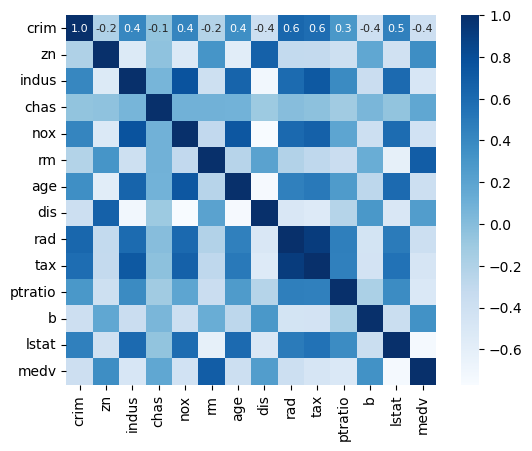

In [20]:
corr = df.corr()
sns.heatmap(corr , cbar=True , square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [47]:
X = df.drop(columns=['medv'])
y = df['medv']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [64]:
model = XGBRegressor(max_depth=3)
model.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

#Score train
r2_train = metrics.r2_score(y_train , pred_train)
mae_train = metrics.mean_absolute_error(y_train , pred_train)

#Score test
r2_test = metrics.r2_score(y_test , pred_test)
mae_test = metrics.mean_absolute_error(y_test , pred_test)

print('Score Train')
print('r2',r2_train)
print('mae',mae_train)
print('-'*50)
print('Score Test')
print('r2',r2_test)
print('mae',mae_test)

Score Train
r2 0.9954334917920749
mae 0.4766092693738345
--------------------------------------------------
Score Test
r2 0.8867001568550771
mae 2.0749289606746872


In [66]:
model.feature_importances_

array([0.02181181, 0.01562397, 0.01165358, 0.01393463, 0.05745193,
       0.29975933, 0.00727399, 0.07523811, 0.0217185 , 0.03110555,
       0.05843617, 0.01031708, 0.3756754 ], dtype=float32)

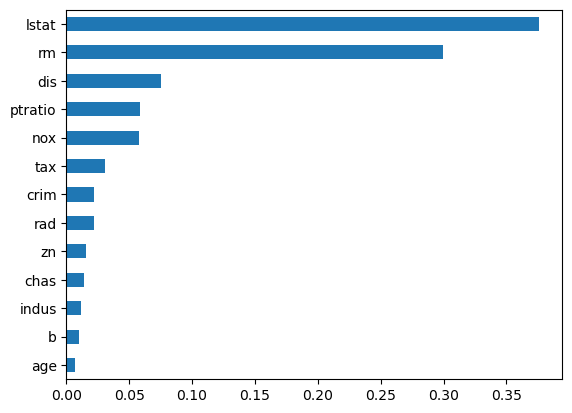

In [69]:
rank = pd.Series(model.feature_importances_ , index=X_train.columns, name='Importance').sort_values()
rank.plot(kind='barh')
plt.show()